In [816]:
import numpy as np
import astropy.units as u
from astropy import constants as const
import scipy.integrate as integrate
import imf
from imf import ChabrierPowerLaw
from imf import ChabrierLogNormal
from imf import Kroupa
from imf import Salpeter
import matplotlib.pyplot as plt

# Homework Three

$\xi = \frac{dN}{dM}$

$M_{max} = 120 M_{\odot}$

### Salpeter:

$\xi = M^{-2.35}, M_{min} = 0.03$

In [62]:
def saltpeter_num(M): # dN/dM
    return M**(-2.35)

def saltpeter_mass(M): # dN/dM * M
    return M**(-1.35)

### Kroupa

$\xi = M^{\alpha}
\begin{cases}
\alpha = 0.3, & 0.03 < M/M_{\odot} < 0.08\\
\alpha = 1.3, & 0.08 < M/M_{\odot} < 0.5\\
\alpha = 2.3, & 0.5 < M/M_{\odot} < 120 
\end{cases}
$


In [63]:
def kroupa_num(M): # dN/dM
    if 0.03 < M and M < 0.08:
        return M**(-0.3)
    elif 0.08 < M and M < 0.5:
        return M**(-1.3)
    elif 0.5 < M:
        return M**(-2.3)
    else: 
        return False
    
def kroupa_mass(M): # dN/dM * M
    if 0.03 < M and M < 0.08:
        return M**(-0.3+1)
    elif 0.08 < M and M < 0.5:
        return M**(-1.3+1)
    elif 0.5 < M:
        return M**(-2.3+1)
    else: 
        return False
    


### Chabrier

$M \leq 1 M_{\odot}$:

$\xi(log M) = \frac{dN}{d log M} = A exp[(log M - log M_{c})^2 / 2 \sigma^2]$

A = 0.086, M$_c$ = 0.22, $\sigma$ = 0.57

$M > 1 M_{\odot}$:

$\xi(log M) = A M^{-\Gamma}$

$\Gamma$ = 1.3, $A$ = 4.43

$dln(x) = \frac{1}{x}dx$

$\frac{dN}{dlogM} = M \frac{dN}{dM}$

$\frac{dN}{dM} = \frac{1}{M} \frac{dN}{dlogM}$

In [64]:
#xi = 0.086 exp (-(log m - log 0.22)^2 / (2 * 0.57**2))

def chabrier_num(M):
    if M <= 1:
        #M = np.log(M)
        A = 0.086
        mc = 0.22
        sig = 0.57
        return A * np.exp(-(np.log10(M) - np.log10(mc))**2 / (2*sig**2)) / M
    elif M > 1:
        #M = np.log(M)
        gamma = 1.3
        A = 4.43
        return A * M**(-gamma) / M
    
def chabrier_mass(M):
    if M <= 1:
        #M = np.log(M)
        A = 0.086
        mc = 0.22
        sig = 0.57
        return A * np.exp(-(np.log10(M) - np.log10(mc))**2 / (2*sig**2)) 
    elif M > 1:
        #M = np.log(M)
        gamma = 1.3
        A = 4.43
        return A * M**(-gamma)
    
def chabrier_powerlaw(M):
    return 4.43 * M **(-1.3) / M
def chabrier_powerlaw_mass(M):
    return 4.43 * M**(-1.3) 

#### A) What is the average mass?

take the total mass and divide by total number of stars 

do the integral of the imf to find the number of stars to find the mass 

intregral of dN/dM * M = mass

integral of dN/dM = number

integrate.quad(func, limit_low, limit_max)

In [560]:
M_max = 120 #* u.M_sun
M_min = 0.03

##### Salpeter

In [561]:
tot_num = integrate.quad(saltpeter_num, 0.01, M_max)[0]
tot_mass = integrate.quad(saltpeter_mass, 0.01, M_max)[0]
avg_mass = tot_mass / tot_num
avg_mass*u.M_sun

<Quantity 0.03713091 solMass>

In [571]:
sal = imf.Salpeter(mmin=M_min, mmax=M_max)
tot_num = sal.integrate(mlow=M_min, mhigh=M_max)[0]
tot_mass = sal.m_integrate(mlow=M_min, mhigh=M_max)[0]
avg_mass=tot_mass / tot_num
avg_mass

0.10936736093326276

In [563]:
### M_min = 0.03
tot_num = integrate.quad(saltpeter_num, 0.03, M_max)[0]
tot_mass = integrate.quad(saltpeter_mass, 0.03, M_max)[0]
avg_mass = tot_mass / tot_num
avg_mass*u.M_sun

<Quantity 0.10936736 solMass>

##### Kroupa

In [564]:
# Kroupa
tot_num = integrate.quad(kroupa_num, 0.03, 0.08)[0] + integrate.quad(kroupa_num, 0.08, 0.5)[0] + integrate.quad(kroupa_num, 0.5, M_max)[0]
tot_mass = integrate.quad(kroupa_mass, 0.03, 0.08)[0] + integrate.quad(kroupa_mass, 0.08, 0.5)[0] + integrate.quad(kroupa_mass, 0.5, M_max)[0]
avg_mass = tot_mass / tot_num
avg_mass*u.M_sun

<Quantity 0.78729974 solMass>

In [572]:
### Using imf package
k = Kroupa(mmin=M_min, mmax=M_max)
tot_num = k.integrate(mlow=0.03, mhigh=M_max)[0]
tot_mass = k.m_integrate(mlow=0.03, mhigh=M_max)[0]
avg_mass=tot_mass / tot_num
avg_mass

0.4339293611895671

##### Chabrier

In [566]:
# Chabrier
# dln(x) = 1/x dx
tot_num = integrate.quad(chabrier_num, M_min, 1.0)[0] + integrate.quad(chabrier_num, 1.0, M_max)[0]
tot_mass = integrate.quad(chabrier_mass, M_min, 1.0)[0] + integrate.quad(chabrier_mass, 1.0, M_max)[0]
avg_mass = tot_mass / tot_num
avg_mass*u.M_sun

<Quantity 3.11776783 solMass>

In [567]:
tot_num = integrate.quad(chabrier_powerlaw, M_min, M_max)[0]
tot_mass = integrate.quad(chabrier_powerlaw_mass, M_min, M_max)[0]

avg_mass = tot_mass/tot_num
avg_mass

0.11920492197406174

In [573]:
### Using imf package
c = ChabrierPowerLaw(mmin=M_min, mmax=M_max)
tot_num = c.integrate(mlow=M_min, mhigh=M_max)[0]
tot_mass = c.m_integrate(mlow=M_min, mhigh=M_max)[0]
avg_mass = tot_mass / tot_num
avg_mass

0.669288461104936

In [569]:
c_log = ChabrierLogNormal()
tot_num = c_log.integrate(mlow=M_min, mhigh=M_max)[0]
tot_mass = c_log.m_integrate(mlow=M_min, mhigh=M_max)[0]
avg_mass = tot_mass / tot_num
avg_mass

0.5550312958454777

In [570]:
tot_num = c_log.integrate(mlow=M_min, mhigh=1)[0] + c.integrate(mlow=1, mhigh=M_max)[0]
tot_mass = c_log.m_integrate(mlow=M_min, mhigh=1)[0] + c.m_integrate(mlow=1, mhigh=M_max)[0]
avg_mass = tot_mass / tot_num
avg_mass

2.197911574655067

#### B) Average mass of stars with $M > 8 M_{\odot}$

In [118]:
# Saltpeter
tot_num = integrate.quad(saltpeter_num, 8, M_max)
tot_mass = integrate.quad(saltpeter_mass, 8, M_max)
avg_mass = tot_mass[0] / tot_num[0]
avg_mass*u.M_sun

<Quantity 19.39858829 solMass>

In [119]:
# Kroupa
tot_num = integrate.quad(kroupa_num, 8, M_max)[0]
tot_mass = integrate.quad(kroupa_mass, 8, M_max)[0]
avg_mass = tot_mass / tot_num
avg_mass*u.M_sun

<Quantity 19.86998669 solMass>

In [120]:
tot_num = k.integrate(8, M_max)[0]
tot_mass = k.m_integrate(8, M_max)[0]
avg_mass = tot_mass / tot_num
avg_mass

19.869986688415427

In [121]:
# Chabrier
tot_num = integrate.quad(chabrier_num, 8.0, M_max)[0]
tot_mass = integrate.quad(chabrier_mass, 8.0, M_max)[0]
avg_mass = tot_mass / tot_num
avg_mass*u.M_sun

<Quantity 19.86998669 solMass>

In [122]:
tot_num = c.integrate(8, M_max)[0]
tot_mass = c.m_integrate(8, M_max)[0]
avg_mass = tot_mass / tot_num
avg_mass

19.869986688415548

#### C) What is the ratio of the number of high mass (> 8 $M_{\odot}$) to low mass (< 8 $M_{\odot}$) stars?

In [123]:
# Saltpeter
low_m = integrate.quad(saltpeter_num, M_min, 8)[0]
high_m = integrate.quad(saltpeter_num, 8, M_max)[0]
ratio = high_m / low_m
ratio

0.0005173727037115695

In [124]:
# Kroupa
low_m = integrate.quad(kroupa_num, M_min, 0.08)[0] + integrate.quad(kroupa_num, 0.08, 0.5)[0] + integrate.quad(kroupa_num, 0.5, 8)[0]
high_m = integrate.quad(kroupa_num, 8, M_max)[0]
ratio = high_m / low_m
ratio

0.010058603071593154

In [125]:
high_num = k.integrate(8, M_max)[0]
low_num = k.integrate(M_min, 8)[0]
ratio = high_num / low_num
ratio

0.0045936595522184384

In [126]:
# Chabrier
low_m = integrate.quad(chabrier_num, M_min, 1)[0] + integrate.quad(chabrier_num, 1, 8)[0]
high_m = integrate.quad(chabrier_num, 8, M_max)[0]
ratio = high_m / low_m
ratio

0.06498038124125519

In [127]:
high_num = c.integrate(8, M_max)[0]
low_num = c.integrate(M_min, 8)[0]
ratio = high_num / low_num
ratio

0.008461822689562252

#### D) What is the ratio of the MASS of high mass to low mass stars?

In [128]:
# Saltpeter
low_m = integrate.quad(saltpeter_mass, M_min, 8)[0]
high_m = integrate.quad(saltpeter_mass, 8, M_max)[0]
ratio = high_m / low_m
ratio

0.1009813655962592

In [129]:
# Kroupa
low_m = integrate.quad(kroupa_mass, M_min, 0.08)[0] + integrate.quad(kroupa_mass, 0.08, 0.5)[0] + integrate.quad(kroupa_mass, 0.5, 8)[0]
high_m = integrate.quad(kroupa_mass, 8, M_max)[0]
ratio = high_m / low_m
ratio

0.3357063521835148

In [130]:
low_m = k.m_integrate(M_min, 8)[0]
high_m = k.m_integrate(8, M_max)[0]
ratio = high_m / low_m
ratio

0.2648391700807196

In [131]:
# Chabrier
low_m = integrate.quad(chabrier_mass, M_min, 1)[0] + integrate.quad(chabrier_mass, 1, 8)[0]
high_m = integrate.quad(chabrier_mass, 8, M_max)[0]
ratio = high_m / low_m
ratio

0.6362891153712947

In [132]:
low_m = c.m_integrate(M_min, 8)[0]
high_m = c.m_integrate(8, M_max)[0]
ratio = high_m / low_m
ratio

0.33175047970763344

#### E) Do these numbers change if you change $M_{max} = 100 M_{\odot}$? To $M_{max} = 1000 M_{\odot}$?

In [133]:
M_max = 100

In [134]:
# Saltpeter
print('Saltpeter')
tot_num = integrate.quad(saltpeter_num, 0.03, M_max)
tot_mass = integrate.quad(saltpeter_mass, 0.03, M_max)
avg_mass = tot_mass[0] / tot_num[0]
print('Avg Mass:', avg_mass*u.M_sun)

tot_num = integrate.quad(saltpeter_num, 0.03, M_max)
tot_mass = integrate.quad(saltpeter_mass, 8, M_max)
avg_mass = tot_mass[0] / tot_num[0]
print('Avg > 8 M_sun:', avg_mass*u.M_sun)

low_m = integrate.quad(saltpeter_num, 0.03, 8)[0]
high_m = integrate.quad(saltpeter_num, 8, M_max)[0]
ratio = high_m / low_m
print('Ratio of number of high to low:', ratio)

low_m = integrate.quad(saltpeter_mass, 0.03, 8)[0]
high_m = integrate.quad(saltpeter_mass, 8, M_max)[0]
ratio = high_m / low_m
print('Ratio of mass of high to low:', ratio)

Saltpeter
Avg Mass: 0.10894945817647692 solMass
Avg > 8 M_sun: 0.00961282725817428 solMass
Ratio of number of high to low: 0.0005135430064225414
Ratio of mass of high to low: 0.09677021627681466


In [135]:
# Kroupa
print('Kroupa')
tot_num = integrate.quad(kroupa_num, 0.03, 0.08)[0] + integrate.quad(kroupa_num, 0.08, 0.5)[0] + integrate.quad(kroupa_num, 0.5, M_max)[0]
tot_mass = integrate.quad(kroupa_mass, 0.03, 0.08)[0] + integrate.quad(kroupa_mass, 0.08, 0.5)[0] + integrate.quad(kroupa_mass, 0.5, M_max)[0]
avg_mass = tot_mass / tot_num
print('Avg Mass:', avg_mass*u.M_sun)

tot_num = integrate.quad(kroupa_num, 8, M_max)[0]
tot_mass = integrate.quad(kroupa_mass, 8, M_max)[0]
avg_mass = tot_mass / tot_num
print('Avg > 8 M_sun:', avg_mass*u.M_sun)

low_m = integrate.quad(kroupa_num, 0.03, 0.08)[0] + integrate.quad(kroupa_num, 0.08, 0.5)[0] + integrate.quad(kroupa_num, 0.5, 8)[0]
high_m = integrate.quad(kroupa_num, 8, M_max)[0]
ratio = high_m / low_m
print('Ratio of number of high to low:', ratio)

low_m = integrate.quad(kroupa_mass, 0.03, 0.08)[0] + integrate.quad(kroupa_mass, 0.08, 0.5)[0] + integrate.quad(kroupa_mass, 0.5, 8)[0]
high_m = integrate.quad(kroupa_mass, 8, M_max)[0]
ratio = high_m / low_m
print('Ratio of mass of high to low:', ratio)

Kroupa
Avg Mass: 0.7784871202953053 solMass
Avg > 8 M_sun: 19.13472991713344 solMass
Ratio of number of high to low: 0.009976581685332957
Ratio of mass of high to low: 0.32064790865311793


In [136]:
print('Kroupa (with imf package)')

tot_num = k.integrate(mlow=M_min, mhigh=M_max)[0]
tot_mass = k.m_integrate(mlow=M_min, mhigh=M_max)[0]
avg_mass=tot_mass / tot_num
print('Avg Mass:', avg_mass*u.M_sun)

tot_num = k.integrate(8, M_max)[0]
tot_mass = k.m_integrate(8, M_max)[0]
avg_mass = tot_mass / tot_num
print('Avg > 8 M_sun:', avg_mass*u.M_sun)

high_num = k.integrate(8, M_max)[0]
low_num = k.integrate(M_min, 8)[0]
ratio = high_num / low_num
print('Ratio of number of high to low:', ratio)

low_m = k.m_integrate(M_min, 8)[0]
high_m = k.m_integrate(8, M_max)[0]
ratio = high_m / low_m
print('Ratio of mass of high to low:', ratio)

Kroupa (with imf package)
Avg Mass: 0.42986983742403484 solMass
Avg > 8 M_sun: 19.134729917133537 solMass
Ratio of number of high to low: 0.004556201237003186
Ratio of mass of high to low: 0.2529595447434023


In [137]:
# Chabrier
print('Chabrier:')
tot_num = integrate.quad(chabrier_num, 0.03, 1.0)[0] + integrate.quad(chabrier_num, 1.0, M_max)[0]
tot_mass = integrate.quad(chabrier_mass, 0.03, 1.0)[0] + integrate.quad(chabrier_mass, 1.0, M_max)[0]
avg_mass = tot_mass / tot_num
print('Avg Mass:', avg_mass*u.M_sun)

tot_num = integrate.quad(chabrier_num, 8.0, M_max)[0]
tot_mass = integrate.quad(chabrier_mass, 8.0, M_max)[0]
avg_mass = tot_mass / tot_num
print('Avg > 8 M_sun:', avg_mass*u.M_sun)

low_m = integrate.quad(chabrier_num, 0.03, 1)[0] + integrate.quad(chabrier_num, 1, 8)[0]
high_m = integrate.quad(chabrier_num, 8, M_max)[0]
ratio = high_m / low_m
print('Ratio of number of high to low:', ratio)

low_m = integrate.quad(chabrier_mass, 0.03, 1)[0] + integrate.quad(chabrier_mass, 1, 8)[0]
high_m = integrate.quad(chabrier_mass, 8, M_max)[0]
ratio = high_m / low_m
print('Ratio of mass of high to low:', ratio)

Chabrier:
Avg Mass: 3.064910302459881 solMass
Avg > 8 M_sun: 19.134729917133438 solMass
Ratio of number of high to low: 0.06445050836415799
Ratio of mass of high to low: 0.607747731955389


In [138]:
print('Chabrier (with imf package-PowerLaw)')

tot_num = c.integrate(mlow=M_min, mhigh=M_max)[0]
tot_mass = c.m_integrate(mlow=M_min, mhigh=M_max)[0]
avg_mass = tot_mass / tot_num
print('Avg Mass:', avg_mass*u.M_sun)

tot_num = c.integrate(mlow=8, mhigh=M_max)[0]
tot_mass = c.m_integrate(mlow=8, mhigh=M_max)[0]
avg_mass = tot_mass / tot_num
print('Avg > 8 M_sun:', avg_mass*u.M_sun)

high_num = c.integrate(8, M_max)[0]
low_num = c.integrate(M_min, 8)[0]
ratio = high_num / low_num
print('Ratio of number of high to low:', ratio)

low_m = c.m_integrate(M_min, 8)[0]
high_m = c.m_integrate(8, M_max)[0]
ratio = high_m / low_m
print('Ratio of mass of high to low:', ratio)

Chabrier (with imf package-PowerLaw)
Avg Mass: 0.6618551075127788 solMass
Avg > 8 M_sun: 19.134729917133445 solMass
Ratio of number of high to low: 0.008392822011998388
Ratio of mass of high to low: 0.31686948078590743


In [140]:
print('Chabrier (with imf package)')

tot_num = c_log.integrate(mlow=M_min, mhigh=1)[0] + c.integrate(mlow=1, mhigh=M_max)[0]
tot_mass = c_log.m_integrate(mlow=M_min, mhigh=1)[0] + c.m_integrate(mlow=1, mhigh=M_max)[0]
avg_mass = tot_mass / tot_num
print('Avg Mass:', avg_mass*u.M_sun)

tot_num = c.integrate(mlow=8, mhigh=M_max)[0]
tot_mass = c.m_integrate(mlow=8, mhigh=M_max)[0]
avg_mass = tot_mass / tot_num
print('Avg > 8 M_sun:', avg_mass*u.M_sun)

high_num = c.integrate(8, M_max)[0]
low_num = c_log.m_integrate(M_min, 1)[0] +c.integrate(M_min, 8)[0]
ratio = high_num / low_num
print('Ratio of number of high to low:', ratio)

low_m = c_log.m_integrate(M_min, 1)[0] + c.m_integrate(1, 8)[0]
high_m = c.m_integrate(8, M_max)[0]
ratio = high_m / low_m
print('Ratio of mass of high to low:', ratio)

Chabrier (with imf package)
Avg Mass: 2.161877271259899 solMass
Avg > 8 M_sun: 19.134729917133445 solMass
Ratio of number of high to low: 0.008220324365628473
Ratio of mass of high to low: 0.567904021882603


In [147]:
M_max = 1000

In [148]:
# Saltpeter
print('Saltpeter')
tot_num = integrate.quad(saltpeter_num, M_min, M_max)
tot_mass = integrate.quad(saltpeter_mass, M_min, M_max)
avg_mass = tot_mass[0] / tot_num[0]
print('Avg Mass:', avg_mass*u.M_sun)

tot_num = integrate.quad(saltpeter_num, 8, M_max)
tot_mass = integrate.quad(saltpeter_mass, 8, M_max)
avg_mass = tot_mass[0] / tot_num[0]
print('Avg > 8 M_sun:', avg_mass*u.M_sun)

low_m = integrate.quad(saltpeter_num, M_min, 8)[0]
high_m = integrate.quad(saltpeter_num, 8, M_max)[0]
ratio = high_m / low_m
print('Ratio of number of high to low:', ratio)

low_m = integrate.quad(saltpeter_mass, M_min, 8)[0]
high_m = integrate.quad(saltpeter_mass, 8, M_max)[0]
ratio = high_m / low_m
print('Ratio of mass of high to low:', ratio)

Saltpeter
Avg Mass: 0.11269178279278524 solMass
Avg > 8 M_sun: 25.20008661135427 solMass
Ratio of number of high to low: 0.0005303116697970722
Ratio of mass of high to low: 0.13446238785870648


In [149]:
# Kroupa
print('Kroupa')
tot_num = integrate.quad(kroupa_num, M_min, 0.08)[0] + integrate.quad(kroupa_num, 0.08, 0.5)[0] + integrate.quad(kroupa_num, 0.5, M_max)[0]
tot_mass = integrate.quad(kroupa_mass, M_min, 0.08)[0] + integrate.quad(kroupa_mass, 0.08, 0.5)[0] + integrate.quad(kroupa_mass, 0.5, M_max)[0]
avg_mass = tot_mass / tot_num
print('Avg Mass:', avg_mass*u.M_sun)

tot_num = integrate.quad(kroupa_num, 8, M_max)[0]
tot_mass = integrate.quad(kroupa_mass, 8, M_max)[0]
avg_mass = tot_mass / tot_num
print('Avg > 8 M_sun:', avg_mass*u.M_sun)

low_m = integrate.quad(kroupa_num, M_min, 0.08)[0] + integrate.quad(kroupa_num, 0.08, 0.5)[0] + integrate.quad(kroupa_num, 0.5, 8)[0]
high_m = integrate.quad(kroupa_num, 8, M_max)[0]
ratio = high_m / low_m
print('Ratio of number of high to low:', ratio)

low_m = integrate.quad(kroupa_mass, M_min, 0.08)[0] + integrate.quad(kroupa_mass, 0.08, 0.5)[0] + integrate.quad(kroupa_mass, 0.5, 8)[0]
high_m = integrate.quad(kroupa_mass, 8, M_max)[0]
ratio = high_m / low_m
print('Ratio of mass of high to low:', ratio)

Kroupa
Avg Mass: 0.8613573949596953 solMass
Avg > 8 M_sun: 26.572582248149743 solMass
Ratio of number of high to low: 0.010345786009095798
Ratio of mass of high to low: 0.46176558641927584


In [151]:
print('Kroupa (with imf package)')

tot_num = k.integrate(mlow=M_min, mhigh=M_max)[0]
tot_mass = k.m_integrate(mlow=M_min, mhigh=M_max)[0]
avg_mass=tot_mass / tot_num
print('Avg Mass:', avg_mass*u.M_sun)

tot_num = k.integrate(8, M_max)[0]
tot_mass = k.m_integrate(8, M_max)[0]
avg_mass = tot_mass / tot_num
print('Avg > 8 M_sun:', avg_mass*u.M_sun)

high_num = k.integrate(8, M_max)[0]
low_num = k.integrate(M_min, 8)[0]
ratio = high_num / low_num
print('Ratio of number of high to low:', ratio)

low_m = k.m_integrate(M_min, 8)[0]
high_m = k.m_integrate(8, M_max)[0]
ratio = high_m / low_m
print('Ratio of mass of high to low:', ratio)

Kroupa (with imf package)
Avg Mass: 0.4339293611895671 solMass
Avg > 8 M_sun: 19.869986688415427 solMass
Ratio of number of high to low: 0.0045936595522184384
Ratio of mass of high to low: 0.2648391700807196


In [152]:
# Chabrier
print('Chabrier:')
tot_num = integrate.quad(chabrier_num, M_min, 1.0)[0] + integrate.quad(chabrier_num, 1.0, M_max)[0]
tot_mass = integrate.quad(chabrier_mass, M_min, 1.0)[0] + integrate.quad(chabrier_mass, 1.0, M_max)[0]
avg_mass = tot_mass / tot_num
print('Avg Mass:', avg_mass*u.M_sun)

tot_num = integrate.quad(chabrier_num, 8.0, M_max)[0]
tot_mass = integrate.quad(chabrier_mass, 8.0, M_max)[0]
avg_mass = tot_mass / tot_num
print('Avg > 8 M_sun:', avg_mass*u.M_sun)

low_m = integrate.quad(chabrier_num, M_min, 1)[0] + integrate.quad(chabrier_num, 1, 8)[0]
high_m = integrate.quad(chabrier_num, 8, M_max)[0]
ratio = high_m / low_m
print('Ratio of number of high to low:', ratio)

low_m = integrate.quad(chabrier_mass, M_min, 1)[0] + integrate.quad(chabrier_mass, 1, 8)[0]
high_m = integrate.quad(chabrier_mass, 8, M_max)[0]
ratio = high_m / low_m
print('Ratio of mass of high to low:', ratio)

Chabrier:
Avg Mass: 3.566807793287487 solMass
Avg > 8 M_sun: 26.572582248150454 solMass
Ratio of number of high to low: 0.06683563456341768
Ratio of mass of high to low: 0.8752185193416078


In [154]:
print('Chabrier (with imf package-PowerLaw)')

tot_num = c.integrate(mlow=M_min, mhigh=M_max)[0]
tot_mass = c.m_integrate(mlow=M_min, mhigh=M_max)[0]
avg_mass = tot_mass / tot_num
print('Avg Mass:', avg_mass*u.M_sun)

tot_num = c.integrate(mlow=8, mhigh=M_max)[0]
tot_mass = c.m_integrate(mlow=8, mhigh=M_max)[0]
avg_mass = tot_mass / tot_num
print('Avg > 8 M_sun:', avg_mass*u.M_sun)

high_num = c.integrate(8, M_max)[0]
low_num = c.integrate(M_min, 8)[0]
ratio = high_num / low_num
print('Ratio of number of high to low:', ratio)

low_m = c.m_integrate(M_min, 8)[0]
high_m = c.m_integrate(8, M_max)[0]
ratio = high_m / low_m
print('Ratio of mass of high to low:', ratio)

Chabrier (with imf package-PowerLaw)
Avg Mass: 0.7317193365937897 solMass
Avg > 8 M_sun: 26.572582248149732 solMass
Ratio of number of high to low: 0.008703415988285603
Ratio of mass of high to low: 0.45632426616499994


In [155]:
print('Chabrier (with imf package)')

tot_num = c_log.integrate(mlow=M_min, mhigh=1)[0] + c.integrate(mlow=1, mhigh=M_max)[0]
tot_mass = c_log.m_integrate(mlow=M_min, mhigh=1)[0] + c.m_integrate(mlow=1, mhigh=M_max)[0]
avg_mass = tot_mass / tot_num
print('Avg Mass:', avg_mass*u.M_sun)

tot_num = c.integrate(mlow=8, mhigh=M_max)[0]
tot_mass = c.m_integrate(mlow=8, mhigh=M_max)[0]
avg_mass = tot_mass / tot_num
print('Avg > 8 M_sun:', avg_mass*u.M_sun)

high_num = c.integrate(8, M_max)[0]
low_num = c_log.m_integrate(M_min, 1)[0] +c.integrate(M_min, 8)[0]
ratio = high_num / low_num
print('Ratio of number of high to low:', ratio)

low_m = c_log.m_integrate(M_min, 1)[0] + c.m_integrate(1, 8)[0]
high_m = c.m_integrate(8, M_max)[0]
ratio = high_m / low_m
print('Ratio of mass of high to low:', ratio)

Chabrier (with imf package)
Avg Mass: 2.5027063338453632 solMass
Avg > 8 M_sun: 26.572582248149732 solMass
Ratio of number of high to low: 0.00852453470482561
Ratio of mass of high to low: 0.8178395262143414


#### F) Do these numbers change if you change $M_{min} = 0.03 M_{\odot}$? To $M_{min} = 0.3 M_{\odot}$

In [156]:
M_max = 120
M_min = 0.03

In [157]:
# Saltpeter
print('Saltpeter')
tot_num = integrate.quad(saltpeter_num, M_min, M_max)
tot_mass = integrate.quad(saltpeter_mass, M_min, M_max)
avg_mass = tot_mass[0] / tot_num[0]
print('Avg Mass:', avg_mass*u.M_sun)

tot_num = integrate.quad(saltpeter_num, 8, M_max)
tot_mass = integrate.quad(saltpeter_mass, 8, M_max)
avg_mass = tot_mass[0] / tot_num[0]
print('Avg > 8 M_sun:', avg_mass*u.M_sun)

low_m = integrate.quad(saltpeter_num, M_min, 8)[0]
high_m = integrate.quad(saltpeter_num, 8, M_max)[0]
ratio = high_m / low_m
print('Ratio of number of high to low:', ratio)

low_m = integrate.quad(saltpeter_mass, M_min, 8)[0]
high_m = integrate.quad(saltpeter_mass, 8, M_max)[0]
ratio = high_m / low_m
print('Ratio of mass of high to low:', ratio)

Saltpeter
Avg Mass: 0.10936736093326274 solMass
Avg > 8 M_sun: 19.398588286732235 solMass
Ratio of number of high to low: 0.0005173727037115695
Ratio of mass of high to low: 0.1009813655962592


In [158]:
# Kroupa
print('Kroupa')
tot_num = integrate.quad(kroupa_num, M_min, 0.08)[0] + integrate.quad(kroupa_num, 0.08, 0.5)[0] + integrate.quad(kroupa_num, 0.5, M_max)[0]
tot_mass = integrate.quad(kroupa_mass, M_min, 0.08)[0] + integrate.quad(kroupa_mass, 0.08, 0.5)[0] + integrate.quad(kroupa_mass, 0.5, M_max)[0]
avg_mass = tot_mass / tot_num
print('Avg Mass:', avg_mass*u.M_sun)

tot_num = integrate.quad(kroupa_num, 8, M_max)[0]
tot_mass = integrate.quad(kroupa_mass, 8, M_max)[0]
avg_mass = tot_mass / tot_num
print('Avg > 8 M_sun:', avg_mass*u.M_sun)

low_m = integrate.quad(kroupa_num, M_min, 0.08)[0] + integrate.quad(kroupa_num, 0.08, 0.5)[0] + integrate.quad(kroupa_num, 0.5, 8)[0]
high_m = integrate.quad(kroupa_num, 8, M_max)[0]
ratio = high_m / low_m
print('Ratio of number of high to low:', ratio)

low_m = integrate.quad(kroupa_mass, M_min, 0.08)[0] + integrate.quad(kroupa_mass, 0.08, 0.5)[0] + integrate.quad(kroupa_mass, 0.5, 8)[0]
high_m = integrate.quad(kroupa_mass, 8, M_max)[0]
ratio = high_m / low_m
print('Ratio of mass of high to low:', ratio)

Kroupa
Avg Mass: 0.7872997381688475 solMass
Avg > 8 M_sun: 19.869986688415544 solMass
Ratio of number of high to low: 0.010058603071593154
Ratio of mass of high to low: 0.3357063521835148


In [159]:
print('Kroupa (with imf package)')

tot_num = k.integrate(mlow=M_min, mhigh=M_max)[0]
tot_mass = k.m_integrate(mlow=M_min, mhigh=M_max)[0]
avg_mass=tot_mass / tot_num
print('Avg Mass:', avg_mass*u.M_sun)

tot_num = k.integrate(8, M_max)[0]
tot_mass = k.m_integrate(8, M_max)[0]
avg_mass = tot_mass / tot_num
print('Avg > 8 M_sun:', avg_mass*u.M_sun)

high_num = k.integrate(8, M_max)[0]
low_num = k.integrate(M_min, 8)[0]
ratio = high_num / low_num
print('Ratio of number of high to low:', ratio)

low_m = k.m_integrate(M_min, 8)[0]
high_m = k.m_integrate(8, M_max)[0]
ratio = high_m / low_m
print('Ratio of mass of high to low:', ratio)

Kroupa (with imf package)
Avg Mass: 0.4339293611895671 solMass
Avg > 8 M_sun: 19.869986688415427 solMass
Ratio of number of high to low: 0.0045936595522184384
Ratio of mass of high to low: 0.2648391700807196


In [160]:
# Chabrier
print('Chabrier:')
tot_num = integrate.quad(chabrier_num, M_min, 1.0)[0] + integrate.quad(chabrier_num, 1.0, M_max)[0]
tot_mass = integrate.quad(chabrier_mass, M_min, 1.0)[0] + integrate.quad(chabrier_mass, 1.0, M_max)[0]
avg_mass = tot_mass / tot_num
print('Avg Mass:', avg_mass*u.M_sun)

tot_num = integrate.quad(chabrier_num, 8.0, M_max)[0]
tot_mass = integrate.quad(chabrier_mass, 8.0, M_max)[0]
avg_mass = tot_mass / tot_num
print('Avg > 8 M_sun:', avg_mass*u.M_sun)

low_m = integrate.quad(chabrier_num, M_min, 1)[0] + integrate.quad(chabrier_num, 1, 8)[0]
high_m = integrate.quad(chabrier_num, 8, M_max)[0]
ratio = high_m / low_m
print('Ratio of number of high to low:', ratio)

low_m = integrate.quad(chabrier_mass, M_min, 1)[0] + integrate.quad(chabrier_mass, 1, 8)[0]
high_m = integrate.quad(chabrier_mass, 8, M_max)[0]
ratio = high_m / low_m
print('Ratio of mass of high to low:', ratio)

Chabrier:
Avg Mass: 3.1177678272118206 solMass
Avg > 8 M_sun: 19.86998668841554 solMass
Ratio of number of high to low: 0.06498038124125519
Ratio of mass of high to low: 0.6362891153712947


In [161]:
print('Chabrier (with imf package-PowerLaw)')

tot_num = c.integrate(mlow=M_min, mhigh=M_max)[0]
tot_mass = c.m_integrate(mlow=M_min, mhigh=M_max)[0]
avg_mass = tot_mass / tot_num
print('Avg Mass:', avg_mass*u.M_sun)

tot_num = c.integrate(mlow=8, mhigh=M_max)[0]
tot_mass = c.m_integrate(mlow=8, mhigh=M_max)[0]
avg_mass = tot_mass / tot_num
print('Avg > 8 M_sun:', avg_mass*u.M_sun)

high_num = c.integrate(8, M_max)[0]
low_num = c.integrate(M_min, 8)[0]
ratio = high_num / low_num
print('Ratio of number of high to low:', ratio)

low_m = c.m_integrate(M_min, 8)[0]
high_m = c.m_integrate(8, M_max)[0]
ratio = high_m / low_m
print('Ratio of mass of high to low:', ratio)

Chabrier (with imf package-PowerLaw)
Avg Mass: 0.669288461104936 solMass
Avg > 8 M_sun: 19.869986688415548 solMass
Ratio of number of high to low: 0.008461822689562252
Ratio of mass of high to low: 0.33175047970763344


In [162]:
print('Chabrier (with imf package)')

tot_num = c_log.integrate(mlow=M_min, mhigh=1)[0] + c.integrate(mlow=1, mhigh=M_max)[0]
tot_mass = c_log.m_integrate(mlow=M_min, mhigh=1)[0] + c.m_integrate(mlow=1, mhigh=M_max)[0]
avg_mass = tot_mass / tot_num
print('Avg Mass:', avg_mass*u.M_sun)

tot_num = c.integrate(mlow=8, mhigh=M_max)[0]
tot_mass = c.m_integrate(mlow=8, mhigh=M_max)[0]
avg_mass = tot_mass / tot_num
print('Avg > 8 M_sun:', avg_mass*u.M_sun)

high_num = c.integrate(8, M_max)[0]
low_num = c_log.m_integrate(M_min, 1)[0] +c.integrate(M_min, 8)[0]
ratio = high_num / low_num
print('Ratio of number of high to low:', ratio)

low_m = c_log.m_integrate(M_min, 1)[0] + c.m_integrate(1, 8)[0]
high_m = c.m_integrate(8, M_max)[0]
ratio = high_m / low_m
print('Ratio of mass of high to low:', ratio)

Chabrier (with imf package)
Avg Mass: 2.197911574655067 solMass
Avg > 8 M_sun: 19.869986688415548 solMass
Ratio of number of high to low: 0.008287906872467318
Ratio of mass of high to low: 0.5945742430611102


In [163]:
M_min = 0.3

In [164]:
# Saltpeter
print('Saltpeter')
tot_num = integrate.quad(saltpeter_num, M_min, M_max)
tot_mass = integrate.quad(saltpeter_mass, M_min, M_max)
avg_mass = tot_mass[0] / tot_num[0]
print('Avg Mass:', avg_mass*u.M_sun)

tot_num = integrate.quad(saltpeter_num, 8, M_max)
tot_mass = integrate.quad(saltpeter_mass, 8, M_max)
avg_mass = tot_mass[0] / tot_num[0]
print('Avg > 8 M_sun:', avg_mass*u.M_sun)

low_m = integrate.quad(saltpeter_num, M_min, 8)[0]
high_m = integrate.quad(saltpeter_num, 8, M_max)[0]
ratio = high_m / low_m
print('Ratio of number of high to low:', ratio)

low_m = integrate.quad(saltpeter_mass, M_min, 8)[0]
high_m = integrate.quad(saltpeter_mass, 8, M_max)[0]
ratio = high_m / low_m
print('Ratio of mass of high to low:', ratio)

Saltpeter
Avg Mass: 1.015331092932632 solMass
Avg > 8 M_sun: 19.398588286732235 solMass
Ratio of number of high to low: 0.011715605622491696
Ratio of mass of high to low: 0.2840969312692048


In [165]:
# Kroupa
print('Kroupa')
tot_num = integrate.quad(kroupa_num, M_min, 0.08)[0] + integrate.quad(kroupa_num, 0.08, 0.5)[0] + integrate.quad(kroupa_num, 0.5, M_max)[0]
tot_mass = integrate.quad(kroupa_mass, M_min, 0.08)[0] + integrate.quad(kroupa_mass, 0.08, 0.5)[0] + integrate.quad(kroupa_mass, 0.5, M_max)[0]
avg_mass = tot_mass / tot_num
print('Avg Mass:', avg_mass*u.M_sun)

tot_num = integrate.quad(kroupa_num, 8, M_max)[0]
tot_mass = integrate.quad(kroupa_mass, 8, M_max)[0]
avg_mass = tot_mass / tot_num
print('Avg > 8 M_sun:', avg_mass*u.M_sun)

low_m = integrate.quad(kroupa_num, M_min, 0.08)[0] + integrate.quad(kroupa_num, 0.08, 0.5)[0] + integrate.quad(kroupa_num, 0.5, 8)[0]
high_m = integrate.quad(kroupa_num, 8, M_max)[0]
ratio = high_m / low_m
print('Ratio of number of high to low:', ratio)

low_m = integrate.quad(kroupa_mass, M_min, 0.08)[0] + integrate.quad(kroupa_mass, 0.08, 0.5)[0] + integrate.quad(kroupa_mass, 0.5, 8)[0]
high_m = integrate.quad(kroupa_mass, 8, M_max)[0]
ratio = high_m / low_m
print('Ratio of mass of high to low:', ratio)

Kroupa
Avg Mass: 1.3900436808896965 solMass
Avg > 8 M_sun: 19.869986688415544 solMass
Ratio of number of high to low: 0.01982527987195846
Ratio of mass of high to low: 0.3848180047225327


In [166]:
print('Kroupa (with imf package)')

tot_num = k.integrate(mlow=M_min, mhigh=M_max)[0]
tot_mass = k.m_integrate(mlow=M_min, mhigh=M_max)[0]
avg_mass=tot_mass / tot_num
print('Avg Mass:', avg_mass*u.M_sun)

tot_num = k.integrate(8, M_max)[0]
tot_mass = k.m_integrate(8, M_max)[0]
avg_mass = tot_mass / tot_num
print('Avg > 8 M_sun:', avg_mass*u.M_sun)

high_num = k.integrate(8, M_max)[0]
low_num = k.integrate(M_min, 8)[0]
ratio = high_num / low_num
print('Ratio of number of high to low:', ratio)

low_m = k.m_integrate(M_min, 8)[0]
high_m = k.m_integrate(8, M_max)[0]
ratio = high_m / low_m
print('Ratio of mass of high to low:', ratio)

Kroupa (with imf package)
Avg Mass: 1.1808181605320491 solMass
Avg > 8 M_sun: 19.869986688415427 solMass
Ratio of number of high to low: 0.015617005115274347
Ratio of mass of high to low: 0.34907466236915713


In [167]:
# Chabrier
print('Chabrier:')
tot_num = integrate.quad(chabrier_num, M_min, 1.0)[0] + integrate.quad(chabrier_num, 1.0, M_max)[0]
tot_mass = integrate.quad(chabrier_mass, M_min, 1.0)[0] + integrate.quad(chabrier_mass, 1.0, M_max)[0]
avg_mass = tot_mass / tot_num
print('Avg Mass:', avg_mass*u.M_sun)

tot_num = integrate.quad(chabrier_num, 8.0, M_max)[0]
tot_mass = integrate.quad(chabrier_mass, 8.0, M_max)[0]
avg_mass = tot_mass / tot_num
print('Avg > 8 M_sun:', avg_mass*u.M_sun)

low_m = integrate.quad(chabrier_num, M_min, 1)[0] + integrate.quad(chabrier_num, 1, 8)[0]
high_m = integrate.quad(chabrier_num, 8, M_max)[0]
ratio = high_m / low_m
print('Ratio of number of high to low:', ratio)

low_m = integrate.quad(chabrier_mass, M_min, 1)[0] + integrate.quad(chabrier_mass, 1, 8)[0]
high_m = integrate.quad(chabrier_mass, 8, M_max)[0]
ratio = high_m / low_m
print('Ratio of mass of high to low:', ratio)

Chabrier:
Avg Mass: 3.2459394389404745 solMass
Avg > 8 M_sun: 19.86998668841554 solMass
Ratio of number of high to low: 0.06796382504054982
Ratio of mass of high to low: 0.6381724516558492


In [168]:
print('Chabrier (with imf package-PowerLaw)')

tot_num = c.integrate(mlow=M_min, mhigh=M_max)[0]
tot_mass = c.m_integrate(mlow=M_min, mhigh=M_max)[0]
avg_mass = tot_mass / tot_num
print('Avg Mass:', avg_mass*u.M_sun)

tot_num = c.integrate(mlow=8, mhigh=M_max)[0]
tot_mass = c.m_integrate(mlow=8, mhigh=M_max)[0]
avg_mass = tot_mass / tot_num
print('Avg > 8 M_sun:', avg_mass*u.M_sun)

high_num = c.integrate(8, M_max)[0]
low_num = c.integrate(M_min, 8)[0]
ratio = high_num / low_num
print('Ratio of number of high to low:', ratio)

low_m = c.m_integrate(M_min, 8)[0]
high_m = c.m_integrate(8, M_max)[0]
ratio = high_m / low_m
print('Ratio of mass of high to low:', ratio)

Chabrier (with imf package-PowerLaw)
Avg Mass: 1.369985719728463 solMass
Avg > 8 M_sun: 19.869986688415548 solMass
Ratio of number of high to low: 0.019809120730181016
Ratio of mass of high to low: 0.3922275147753622


In [169]:
print('Chabrier (with imf package)')

tot_num = c_log.integrate(mlow=M_min, mhigh=1)[0] + c.integrate(mlow=1, mhigh=M_max)[0]
tot_mass = c_log.m_integrate(mlow=M_min, mhigh=1)[0] + c.m_integrate(mlow=1, mhigh=M_max)[0]
avg_mass = tot_mass / tot_num
print('Avg Mass:', avg_mass*u.M_sun)

tot_num = c.integrate(mlow=8, mhigh=M_max)[0]
tot_mass = c.m_integrate(mlow=8, mhigh=M_max)[0]
avg_mass = tot_mass / tot_num
print('Avg > 8 M_sun:', avg_mass*u.M_sun)

high_num = c.integrate(8, M_max)[0]
low_num = c_log.m_integrate(M_min, 1)[0] +c.integrate(M_min, 8)[0]
ratio = high_num / low_num
print('Ratio of number of high to low:', ratio)

low_m = c_log.m_integrate(M_min, 1)[0] + c.m_integrate(1, 8)[0]
high_m = c.m_integrate(8, M_max)[0]
ratio = high_m / low_m
print('Ratio of mass of high to low:', ratio)

Chabrier (with imf package)
Avg Mass: 2.8458154617268407 solMass
Avg > 8 M_sun: 19.869986688415548 solMass
Ratio of number of high to low: 0.01916783154728376
Ratio of mass of high to low: 0.6089872935654614


#### G) For a cluster of 1000 stars, how many would you expect to be $M > 8 M_{\odot}$ (able to go supernova)?

In [576]:
N = 1000 # number of stars 
M_max = 120
M_min = 0.03

In [577]:
# Salpeter
'''
tot_m = integrate.quad(saltpeter_num, 0.01, M_max)[0]
high_m = integrate.quad(saltpeter_num, 8, M_max)[0]
ratio = high_m / tot_m
ratio * N

#### Gives same number
'''
# Salpeter
low_m = integrate.quad(saltpeter_num, M_min, 8)[0]
high_m = integrate.quad(saltpeter_num, 8, M_max)[0]
ratio = high_m / low_m
(ratio*N) / (1+ratio) # = # massive stars

0.5171051676128984

In [578]:
tot_num = integrate.quad(saltpeter_num, M_min, M_max)[0]
high_num = integrate.quad(saltpeter_num, 8, M_max)[0]
ratio = high_num / tot_num 
ratio * N

0.5171051676128984

In [579]:
cluster = imf.make_cluster(1000, massfunc='salpeter', mmin=M_min, mmax=M_max)
(cluster > 8.).sum()

Total cluster mass is 999.997 (limit was 1000)


5

In [580]:
# Kroupa
low_m = integrate.quad(kroupa_num, M_min, 0.08)[0] + integrate.quad(kroupa_num, 0.08, 0.5)[0] + integrate.quad(kroupa_num, 0.5, 8)[0]
high_m = integrate.quad(kroupa_num, 8, M_max)[0]
ratio = high_m / low_m
(ratio*N) / (1+ratio) # = # massive stars

9.95843512545202

In [581]:
tot_num = k.integrate(M_min, M_max)[0]
high_num = k.integrate(8, M_max)[0]
ratio = high_num / tot_num
ratio*N

4.572654334953685

In [582]:
cluster = imf.make_cluster(1000, massfunc='kroupa', mmin=M_min, mmax=M_max)
(cluster > 8.).sum()

Total cluster mass is 998.613 (limit was 1000)


6

In [583]:
# Chabrier 
low_m = integrate.quad(chabrier_num, 0.03, 1)[0] + integrate.quad(chabrier_num, 1, 8)[0]
high_m = integrate.quad(chabrier_num, 8, M_max)[0]
ratio = high_m / low_m
(ratio*N) / (1+ratio)

61.01556647036004

In [584]:
tot_num = c.integrate(M_min, M_max)[0]
high_num = c.integrate(8, M_max)[0]
ratio = high_num / tot_num
ratio*N

8.390821048131905

In [585]:
cluster = imf.make_cluster(1000, massfunc='chabrier', mmin=M_min, mmax=M_max)
(cluster > 8.).sum()

Total cluster mass is 1000.03 (limit was 1000)


14

#### H) In an ‘optimal distribution function’, the cluster mass to maximum star mass is fixed by defining $\int^{M_{max}}_{M_{max,cl}} \xi dM = 1$ where $M_{max}$ is the maximum possible mass for a star and $M_{max,cl}$ is the most massive star in the cluster. From this definition, determine how many stars must be in a cluster to form one 10 $M_{\odot}$ star or one 100 $M_{\odot}$ star.

$\int_{M_{max,cl}}^{M_{max, possible}} (\frac{dN}{dM})_{ODF}(M)=1$


In [596]:
#(ratio*N) / (1+ratio) # = # massive stars
# Number massive stars * (1+ratio) = ratio*N
# N = number massive stars * (1+ratio) / ratio

In [668]:
M_max = 120 
M_min = 0.03
M_cl = 10

In [669]:
# Salpeter
norm = integrate.quad(saltpeter_num, M_cl, M_max)[0]
norm**(-1)

31.316381689611458

In [670]:
s = Salpeter(mmin=M_min, mmax=M_max)
norm = s.integrate(M_cl, M_max)[0]
norm**(-1)

2638.263436236092

In [671]:
# Kroupa
k = Kroupa(mmin=M_min, mmax=M_max)
norm = k.integrate(M_cl, M_max)[0]
norm**(-1)

295.3205748878092

In [672]:
# Chabrier
c = ChabrierPowerLaw(mmin=M_min, mmax=M_max)
norm = c.integrate(M_cl, M_max)[0]
norm**(-1)

160.93763640210852

### ---

In [689]:
M_cl = 100
norm = integrate.quad(saltpeter_num, M_cl, M_max)[0]
norm

0.000322467829397256

In [690]:
# Salpeter
norm = integrate.quad(saltpeter_num, M_cl, M_max)[0]
norm**(-1)

3101.0845387868926

In [691]:
s = Salpeter(mmin=M_min, mmax=M_max)
norm = s.integrate(M_cl, M_max)[0]
norm**(-1)

261252.3385519337

In [692]:
# Kroupa
k = Kroupa(mmin=M_min, mmax=M_max)
norm = k.integrate(M_cl, M_max)[0]
norm**(-1)

26818.976074588183

In [693]:
# Chabrier
c = ChabrierPowerLaw(mmin=M_min, mmax=M_max)
norm = c.integrate(M_cl, M_max)[0]
norm**(-1)

14615.24521891874

#### I) What mass of cluster is required to produce a star of that mass?

$\int_{All} M (\frac{dN}{dM})_{ODF}(M)=M_{cl}$

In [678]:
M_max = 120 
M_cl = 10

In [679]:
# Salpeter
norm = integrate.quad(saltpeter_num, M_cl, M_max)[0]
integrate.quad(saltpeter_mass, M_min, M_max)[0] / norm

288.5399094691826

In [680]:
s = Salpeter(mmin=M_min, mmax=M_max)
norm = s.integrate(M_cl, M_max)[0]
s.m_integrate(M_min, M_max)[0] / norm

288.5399094678627

In [681]:
# Kroupa
norm = k.integrate(M_cl, M_max)[0]
k.m_integrate(M_min, M_max)[0] / norm

128.14826840720275

In [682]:
# Chabrier
norm = c.integrate(M_cl, M_max)[0]
c.m_integrate(M_min, M_max)[0] / norm

107.7137030016229

In [765]:
M_cl = 100

In [766]:
# Salpeter
norm = integrate.quad(saltpeter_num, M_cl, M_max)[0]
integrate.quad(saltpeter_mass, M_min, M_max)[0] / norm

28572.47880506828

In [767]:
norm**(-1)

3101.0845387868926

In [768]:
s = Salpeter(mmin=M_min, mmax=M_max)
norm = s.integrate(M_cl, M_max)[0]
s.m_integrate(M_min, M_max)[0] / norm

28572.478805068287

In [769]:
# Kroupa
norm = k.integrate(M_cl, M_max)[0]
k.m_integrate(M_min, M_max)[0] / norm

11637.541155804334

In [770]:
# Chabrier
norm = c.integrate(M_cl, M_max)[0]
c.m_integrate(M_min, M_max)[0] / norm

9781.814981258649

#### J) In a probability distribution function, there is only a fixed likelihood of forming a star of a given mass. What is the minimum cluster mass required to have a > 95% (> 63.21%) probability of forming at least one $\geq$ 100 M$_{\odot}$ star? 

Recall that the likelihood of rolling at least one six after 100 rolls is equal to one minus the likelihood of rolling no sixes in 100 rolls. 

ie $P(\geq 1$ roll of $6) = 1-(\frac{5}{6})^{100}$

In [777]:
P = 0.95
M_max = 120
M_min = 0.03
# P = 1-(high/tot)^N
# P - 1 = -(high/tot)^N
# 1 - P = (high/tot)^N
# log(1-P) = N log(high/tot)
# N = log(1-P) / log(high/tot)

In [778]:
P = 0.95
s = Salpeter(mmin=M_min, mmax=M_max)
tot_num = s.integrate(M_min, M_max)[0]
low_num = s.integrate(M_min, 100)[0]
high_num = s.integrate(100, M_max)
N = np.log(1-P)/np.log(low_num/tot_num)
N

782640.5643236721

In [779]:
# Salpeter
lower_num = integrate.quad(saltpeter_num, M_min, 100)[0]
tot_num = integrate.quad(saltpeter_num, M_min, M_max)[0]
prob = lower_num / tot_num
N = np.log(1-P) / np.log(prob)
N

782640.5642101702

In [780]:
lower_num = s.integrate(M_min, 100)[0]
tot_num = s.integrate(M_min, M_max)[0]
prob = lower_num / tot_num
N = np.log(1-P) / np.log(prob)
N

782640.5643236721

In [781]:
# Kroupa
lower_num = integrate.quad(kroupa_num, M_min, 0.08)[0] + integrate.quad(kroupa_num, 0.08, 0.5)[0] + integrate.quad(kroupa_num, 0.5, 100)[0]
tot_num = integrate.quad(kroupa_num, M_min, 0.08)[0] + integrate.quad(kroupa_num, 0.08, 0.5)[0] + integrate.quad(kroupa_num, 0.5, M_max)[0]
prob = lower_num / tot_num
N = np.log(1-P) / np.log(prob)
N

36889.675176824334

In [782]:
lower_num = k.integrate(M_min, 100)[0]
tot_num = k.integrate(M_min, M_max)[0]
prob = lower_num / tot_num
N = np.log(1-P) / np.log(prob)
N

80340.97429487067

In [783]:
# Chabrier
lower_num = integrate.quad(chabrier_num, M_min, 1)[0] + integrate.quad(chabrier_num, 1, 100)[0]
tot_num = integrate.quad(chabrier_num, M_min, 1)[0] + integrate.quad(chabrier_num, 1, M_max)[0]
prob = lower_num / tot_num
N = np.log(1-P) / np.log(prob)
N

6019.561468772335

In [784]:
lower_num = c.integrate(M_min, 100)[0]
tot_num = c.integrate(M_min, M_max)[0]
prob = lower_num / tot_num
N = np.log(1-P) / np.log(prob)
N

43781.853997832135

In [785]:
P = 0.6321

In [786]:
# Salpeter
lower_num = integrate.quad(saltpeter_num, M_min, 100)[0]
tot_num = integrate.quad(saltpeter_num, M_min, M_max)[0]
prob = lower_num / tot_num
N = np.log(1-P) / np.log(prob)
N

261237.23896009068

In [787]:
# Kroupa
lower_num = integrate.quad(kroupa_num, M_min, 0.08)[0] + integrate.quad(kroupa_num, 0.08, 0.5)[0] + integrate.quad(kroupa_num, 0.5, 100)[0]
tot_num = integrate.quad(kroupa_num, M_min, 0.08)[0] + integrate.quad(kroupa_num, 0.08, 0.5)[0] + integrate.quad(kroupa_num, 0.5, M_max)[0]
prob = lower_num / tot_num
N = np.log(1-P) / np.log(prob)
N

12313.387945913159

In [788]:
lower_num = k.integrate(M_min, 100)[0]
tot_num = k.integrate(M_min, M_max)[0]
prob = lower_num / tot_num
N = np.log(1-P) / np.log(prob)
N

26816.97737113394

In [789]:
# Chabrier
lower_num = integrate.quad(chabrier_num, M_min, 1)[0] + integrate.quad(chabrier_num, 1, 100)[0]
tot_num = integrate.quad(chabrier_num, M_min, 1)[0] + integrate.quad(chabrier_num, 1, M_max)[0]
prob = lower_num / tot_num
N = np.log(1-P) / np.log(prob)
N

2009.2666924817672

In [790]:
lower_num = c.integrate(M_min, 100)[0]
tot_num = c.integrate(M_min, M_max)[0]
prob = lower_num / tot_num
N = np.log(1-P) / np.log(prob)
N

14613.925188620895

#### K)  Compare the results from the ODF and the PDF for the presence of a M > 100 M$_{\odot}$ star. 

What is the ODF and PDF?

ODF = Optimal Distribution Function from part H

PDF = Probability Distribution Function from part J

##### Salpeter

ODF: 261,253 stars in a cluster needed to form one 100 M$_{\odot}$ star. The mass is 28572.5 M$_{\odot}$.

PDF: Cluster of 261,237.2 stars required.

##### Kroupa

ODF: 26,819 stars in a cluster needed to form one 100 M$_{\odot}$ star. The mass is 11637.5 M$_{\odot}$.

PDF (P=63.21 %): Cluster of 26,817 stars required.

##### Chabrier

ODF: 14,616 stars in a cluster needed to form one 100 M$_{\odot}$ star. The mass is 9781.8 M$_{\odot}$

PDF (P=63.21%): Cluster of 12,313.4 stars required.

#### How can you interpret the difference?

The difference between the ODF and PDF is that the ODF requires the presence of a 100 M$_{\odot}$ star using a normalization factor, and the PDF has a fixed likelihood for forming a star that has a mass greater than 100 M$_{\odot}$. 

#### L)  What is the expected light-to-mass ratio of each distribution assuming $L = L_{\odot} (\frac{M}{M_{\odot}})^3$

In [798]:
def light_to_mass(M):
    L = M**3
    return L

M_min = 0.03
M_max = 120
# total amount of light / total amount of mass

In [795]:
# Saltpeter
def salt_f(M):
    return saltpeter_num(M) * light_to_mass(M)
light = integrate.quad(salt_f, M_min, M_max)[0]
mass = integrate.quad(saltpeter_mass, M_min, M_max)[0]
light / mass

177.3088052813851

In [796]:
# Kroupa
def kroupa_f(M):
    k = Kroupa(mmin=0.03, mmax=120)
    return k.dndm(M) * light_to_mass(M)
k = Kroupa(mmin=0.03, mmax=120)
light = integrate.quad(kroupa_f, M_min, M_max)[0]
mass = k.m_integrate(M_min, M_max)[0]
light / mass

424.51902507193

In [797]:
# Chabrier
def chabrier_f(M):
    c = ChabrierPowerLaw(mmin=0.03, mmax=120)
    return c.dndm(M) * light_to_mass(M)
c = ChabrierPowerLaw(mmin=0.03, mmax=120)
light = integrate.quad(chabrier_f, M_min, M_max)[0]
mass = c.m_integrate(M_min, M_max)[0]
light / mass

505.0314387289741

### M)  The IMF is the system IMF. If we are primarily interested in the luminosity of a system, splitting the mass between multiple stars can make a big difference. If we assume every star system consists of an equal-mass binary, what is the effect on the L/M ratio? Is this a reasonable approximation to the multiplicity fraction?

If every star system consists of an equal-mass binary, then the light to mass ratio is 25% what it was with single stars.

Since more than 75% of stars exist in a multiple system, assuming that all stars are part of an equal mass binary system is a good approximation to the multiplicity fraction.

In [800]:
def binary_light(M):
    return 2 * (M/2)**3
# Always reducing the light by a quarter
# February 21st

In [801]:
# Saltpeter
def salt_f2(M):
    return saltpeter_num(M) * binary_light(M)
light = integrate.quad(salt_f2, M_min, M_max)[0]
mass = integrate.quad(saltpeter_mass, M_min, M_max)[0]
light / mass

44.327201320346276

In [802]:
177.3088052813851 / 44.327201320346276

4.0

In [803]:
# Kroupa
def kroupa_f2(M):
    k = Kroupa(mmin=0.03, mmax=120)
    return k.dndm(M) * binary_light(M)
k = Kroupa(mmin=0.03, mmax=120)
light = integrate.quad(kroupa_f2, M_min, M_max)[0]
mass = k.m_integrate(M_min, M_max)[0]
light / mass

106.1297562679825

In [804]:
424.51902507193 / 106.1297562679825

4.0

In [805]:
# Chabrier
def chabrier_f2(M):
    c = ChabrierPowerLaw(mmin=0.03, mmax=120)
    return c.dndm(M) * binary_light(M)
c = ChabrierPowerLaw(mmin=0.03, mmax=120)
light = integrate.quad(chabrier_f2, M_min, M_max)[0]
mass = c.m_integrate(M_min, M_max)[0]
light / mass

126.25785968224352

In [806]:
505.0314387289741 / 126.25785968224352

4.0

####  N) For an ODF, the effective maximum stellar mass can be smaller. If all star-forming events in a galaxy occur in Taurus-like starforming regions, with M$_∗$ = 100M$_{\odot}$, what is the maximum mass? What is the resulting L/M ratio? Recall that this is the maximum the L/M will be in such a galaxy.

$\int_{M_{max,cl}}^{M_{max, possible}} (\frac{dN}{dM})_{ODF}(M)=1$

$\int_{All} M (\frac{dN}{dM})_{ODF}(M)=100$

Probability distribution function - mass larger than star forming event is possible, but not physical. 

optimal distribution function prevents stars more massive than physical from forming.

$\int_{M_{max,cl}}^{M_{max, possible}} (\frac{dN}{dM})_{ODF}(M)=1$

$N(M=M_{max, possible}) - N(M_{max,cl}) = 1$

$N(M_{max,cl}) = N(M=M_{max, possible}) - 1$

$M_{max,cl} = N^{-1}(N(M=M_{max, possible}) - 1)$

In [807]:
M_max = 120
M_min = 0.03

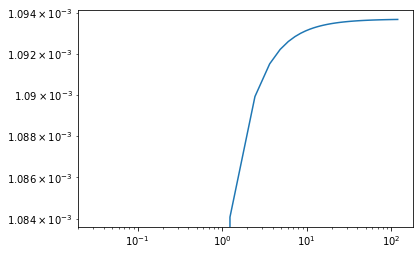

In [821]:
M_tot = 100
s = Salpeter(mmin=M_min,mmax=M_max)
tot_mass = s.m_integrate(M_min, M_max)[0]
# tot_mass * alpha = 100
alpha = 100 / tot_mass
tot_num = s.integrate(M_min, M_max)[0]

def Cm_sal(alpha, M_min, M):
    s = Salpeter(mmin=0.03, mmax=120)
    Cm = np.zeros(len(M))
    for mass in range(len(Cm)): 
        Cm[mass] = 1/alpha * s.integrate(M_min, mass)[0]
    return Cm

M = np.linspace(0.03, 120, num = 100)
Cm = Cm_sal(alpha, M_min, M)
plt.plot(M, Cm)
plt.yscale('log')
plt.xscale('log')